In [1]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
from scipy.signal import find_peaks
import h5py
#do not rerun
h.load_file('stdrun.hoc')
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
fileList = ['class_pyramidalcell.hoc','class_axoaxoniccell.hoc', 'class_pvbasketcell.hoc', 'class_olmcell.hoc']
for item in fileList:
    h.load_file(os.path.join("biophys_components","templates",item))
callNames = ["h." + fileList[i].split('_')[1].split('.')[0] + "()" for i in range(len(fileList))]
callNames.sort()
callNames

['h.axoaxoniccell()', 'h.olmcell()', 'h.pvbasketcell()', 'h.pyramidalcell()']

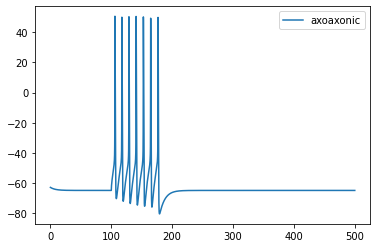

In [11]:
tstop = 500
iclamp_amp = 0.6

Cell1 = h.axoaxoniccell()

iclamp = h.IClamp(Cell1.soma[0](0.5))
iclamp.delay = 100
iclamp.dur = 78
iclamp.amp =iclamp_amp


vCell1 = h.Vector().record(Cell1.soma[0](0.5)._ref_v)


h.dt=0.1
h.L = 20
h.finitialize(-63)
h.continuerun(tstop)

vCell1 = np.array(vCell1)


time = np.linspace(0,tstop,int(tstop/h.dt )+1)#+1 for some reason
plt.plot(time,vCell1,label=str(Cell1).split('cell')[0])
plt.legend()
plt.show()